# [개념 필사]

## CHAPTER 5 <회귀>

## 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

> 규제선형모델 개요

* 최적 모델 위한 비용함수 조건: RSS 최소화 + 회귀계수 크기 제어 (균형 중요)
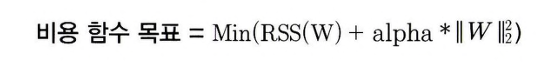
* alpha

 -- 증가 => 회귀계수 감소 => 과적합 개선; **규제**

 -- 감소 => RSS 최소화 => 학습데이터 적합 개선

* L2 규제: 회귀계수의 젝보에 페널티 부여. 릿지
* L1 규제: 회귀계수 절댓값에 페널티 부여. 라쏘

> 릿지 회귀

```
**Ridge 클래스**

alpha - L2 규제 계수
```

* alpha 값 커질수록 회귀 계수값 감소
* 주의! 회귀계수가 지속적으로 감소해도 0이되지는 않음


> 라쏘 회귀

```
**Lasso 클래스**

alpha - L1 규제 계수
```

* alpha 값 커질수록 회귀 계수 감소.
* 불필요한 회귀 계수를 급감시켜 0으로 만들고 제거. (L2와 차이점) ; 적절한 피처만 선택하는 효과

> 엘라스틱넷 회귀

```
**ElasticNet 클래스**

alpha - L1 규제 계수(a) + L2 규제 계수(b)

l1_ratio - a / (a+b)

  -- IF l1_ratio=0: a=0 이므로, L2 규제와 동일
  -- IF l1_ratio=1: b=0 이므로, L1 규제와 동일
```

* L2 규제와 L1 규제를 결합
* 라쏘회귀에서, 피처 선택 경향으로 인한 회귀 계수의 급격한 변동을 완화하기 위해 L2 규제를 라쏘에 추가
* 수행시간 오래걸림

> 선형회귀모델을 위한 데이터 변환

* 정규 분포 형태 매우 적절
* 피처,타깃의 분포 왜곡이 심할 경우, 스케일링/정규화 작업 수행

  (1) 피처 데이터 세트 수행 방법: StandardScaler, MinMaxScaler / 다시 다항 특성 적용하여 변환 / 로그변환 (비교적 더 유용)

  (2) 타킷 데이터 세트 수행 방법: 로그 변환


## 07. 로지스틱 회귀

* 선형 회귀 방식을 분류에 적용한 알고리즘
* 학습을 통해 시그모이드 함수 최적선을 찾고, 해당 함수의 반환 값을 확률로 간주해 그 확률에 따라 분류 결정
* 0 < y < 1
* 선형 회귀 방식 기반, 시그모이드 함수를 사용해 분류를 수행하는 회귀!

```
**LogisticRegression 클래스**

solver - 회귀 계수 최적화 방법 지정 (일반적으로 Ibfgs,liblinear)

  -- lbfgs: CPU 코어수가 많을 때 최적화를 병렬로 수행.
  -- liblinear: 다차원, 소규모 데이터셋에 효과. 병렬 최적화 불가능
  -- newton-cg: 비교적 정교한 최적화. 속도 느림.
  -- sag: Stochastic Average Gradient로서 경사 하강법 기반의 최적화 적용. 대용량의 데이터에 빠름.
  -- saga: sag 와 유사. L1 정규화 가능

penalty - 규제 유형 설정. l2/l1

C - 규제 강도를 조절하는 alpha 의 역수 (작을수록 규제 강도 큼)
```

* 데이터 정규 분포도에 영향 받음
* 이진 분류 예측에 효과적
* 텍스트 분류

## 08. 회귀 트리

* 회귀 함수 기반이 아닌, 트리를 기반으로 하는 회귀 방식.
* 트리 기반 회귀: 회귀를 위한 트리를 생성하고 이를 기반으로 예측.

  -- 리프 노드에 속한 데이터값의 평균값을 구해 예측값 계산 (분류 트리와 차이점)

* 모든 트리 기반 알고리즘은 회귀가 가능함.

```
**Estimator 클래스**
```
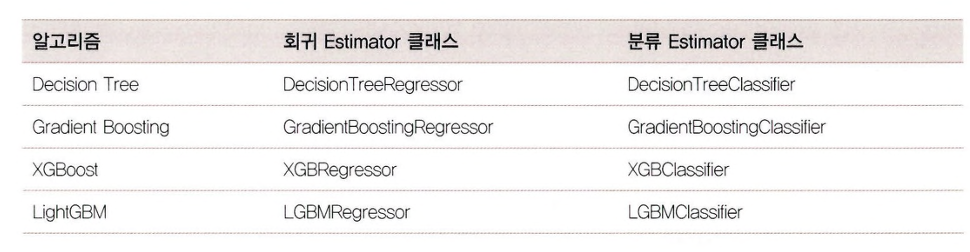

* 회귀 트리 Regressor 클래스에는 coef_ 속성 없음!

# [코드 필사]

In [1]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

bostonDF = boston.copy()
bostonDF = bostonDF.rename(columns={'medv': 'PRICE'})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

* 릿지

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10 릿지회귀수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [5]:
# alpha 값 변화시키며 회귀계수값 파악
alphas = [0,0.1,1,10,100]

# alpha list 반복하며 평균 rmse 구하기
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


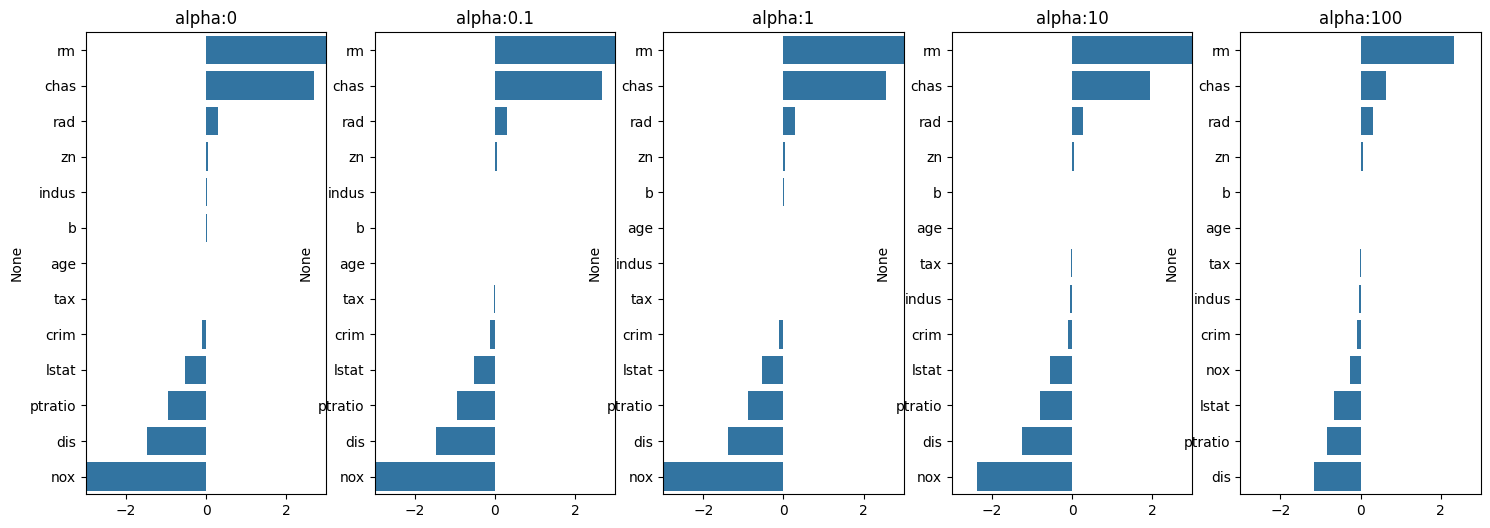

In [6]:
# alpha 변화에  따른 피처의 회귀 계수값 시각화

fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀계수값 저장위한 df 생성
coeff_df = pd.DataFrame()

# alphas 값을 차례로 입력해 회귀계수값 시각화 및 데이터 저장, pos 는 axis 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 df에 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대그래프로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 3)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [7]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
b,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* 라쏘

get_linear_reg_eval(): 회귀모델이름, alpha list, 피처데이터셋, 타겟데이터셋 => alpha 값에 따른 폴드 평균 RMSE 출력 & 회귀계수값 반환

In [8]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                         y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 df 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [9]:
# 라쏘에 적용
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.612
alpha 0.1일 때 5 folds의 평균 RMSE: 5.615
alpha 0.5일 때 5 folds의 평균 RMSE: 5.669
alpha 1일 때 5 folds의 평균 RMSE: 5.776
alpha 3일 때 5 folds의 평균 RMSE: 6.189


In [10]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
b,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


* 엘라스틱넷

In [11]:
# l1_ratio = 0.7 고정

elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.542
alpha 0.1일 때 5 folds의 평균 RMSE: 5.526
alpha 0.5일 때 5 folds의 평균 RMSE: 5.467
alpha 1일 때 5 folds의 평균 RMSE: 5.597
alpha 3일 때 5 folds의 평균 RMSE: 6.068


In [12]:
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.574162,3.414154,1.918419,0.938789,0.000000
chas,1.330724,0.979706,0.000000,0.000000,0.000000
rad,0.278880,0.283443,0.300761,0.289299,0.146846
zn,0.050107,0.050617,0.052878,0.052136,0.038268
b,0.010122,0.010067,0.009114,0.008320,0.007020
age,-0.010116,-0.008276,0.007760,0.020348,0.043446
tax,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
indus,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
crim,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
nox,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


* 데이터 변환


get_scaled_data(): method 인자로 변환 방법을 결정하여 변환 수행

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# p_degree는 다항식 특성 추가할 때 적용. p_degree < 2
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [14]:
# 릿지에 적용

alphas = [0.1,1,10,100]

# 원본, 표준정규분포, 표준정교+다항식특성, 최대최소정규화, 최대최소+다항식특성, 로그변환
scale_methods=[(None,None), ('Standard',None), ('Standard',2),
               ('MinMax',None), ('MinMax',2), ('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.826
alpha 1일 때 5 folds의 평균 RMSE: 5.803
alpha 10일 때 5 folds의 평균 RMSE: 5.637
alpha 100일 때 5 folds의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 8.827
alpha 1일 때 5 folds의 평균 RMSE: 6.871
alpha 10일 때 5 folds의 평균 RMSE: 5.485
alpha 100일 때 5 folds의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.764
alpha 1일 때 5 folds의 평균 RMSE: 5.465
alpha 10일 때 5 folds의 평균 RMSE: 5.754
alpha 100일 때 5 folds의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE: 5.298
alpha 1일 때 5 folds의 평균 RMSE: 4.323
alpha 10일 때 5 folds의 평균 RMSE: 5.185
alpha 100일 때 5 folds의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE: 4.770

* 로지스틱회귀; 유방암 데이터세트 암 여부 판단

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds_proba)))

accuracy: 0.977, roc_auc: 0.995


*max_iter: solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 횟수*

In [19]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver로 LogisticRegression 학습
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

    print('solver:{0}, accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc: 0.995
solver:liblinear, accuracy: 0.982, roc_auc: 0.995
solver:newton-cg, accuracy: 0.977, roc_auc: 0.995
solver:sag, accuracy: 0.982, roc_auc: 0.995
solver:saga, accuracy: 0.982, roc_auc: 0.995


In [20]:
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear', 'lbfgs'], 'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf=LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


* RF 회귀; 보스턴 주택 가격 예측

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

bostonDF = boston.copy()
bostonDF = bostonDF.rename(columns={'medv': 'PRICE'})

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE:4.423


* 결정 트리, GBM, XGBoost, LightGBM의 Regressor; 보스턴 주택 가격 예측

*get_model_cv_prediction(): 교차 검증으로 평균 RMSE 계산*

In [23]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000,verbose=-1)

models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE: 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE: 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE: 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE: 4.959
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE: 4.646


<Axes: xlabel='None', ylabel='None'>

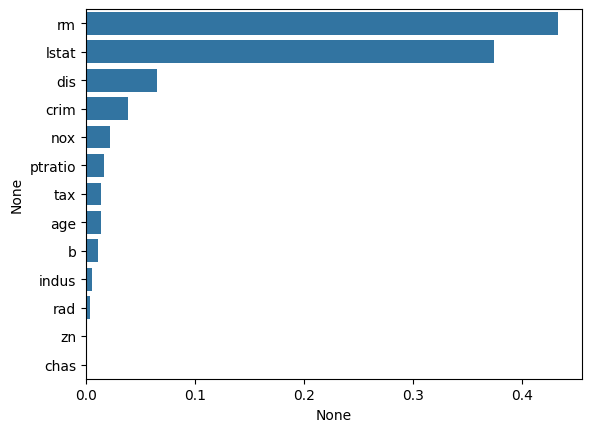

In [26]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

* 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화

(100, 2)


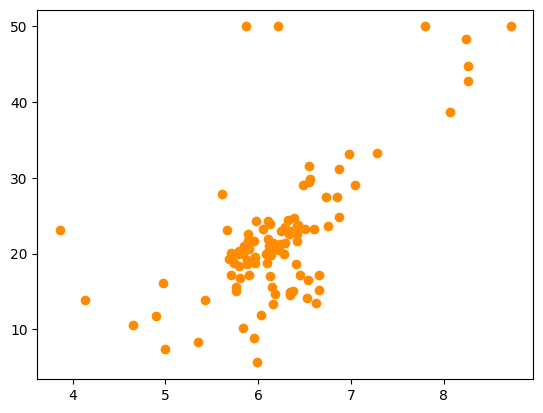

In [30]:
bostonDF_sample=bostonDF[['rm','PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample['rm'], bostonDF_sample['PRICE'], c='darkorange')
plt.show()

* LinearRegression과 DecisionTreeRegressor를 max_depth를
각각 2, 7로 해서 학습

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature=bostonDF_sample['rm'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

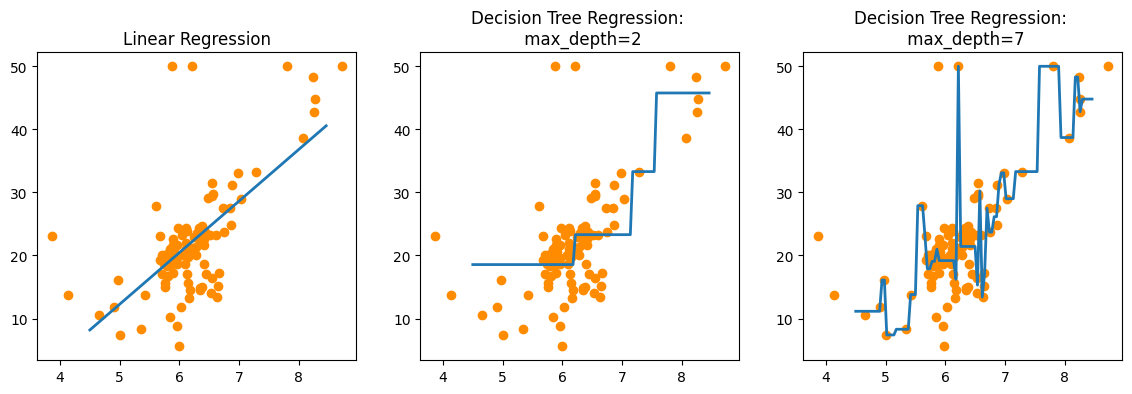

In [33]:
fig, (ax1, ax2, ax3)=plt.subplots(figsize=(14,4),ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample['rm'], bostonDF_sample['PRICE'], c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample['rm'], bostonDF_sample['PRICE'], c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample['rm'], bostonDF_sample['PRICE'], c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)